# Python developer survey 2019 - analysis


Let's start by reading the CSV with survey data, downloaded from [here](https://drive.google.com/drive/folders/1GW86M_QLFOA2KyeWeb8hzBj_RqQIXmAU?usp=sharing) thanks to [JetBrains](https://www.jetbrains.com/lp/python-developers-survey-2019/)

### Idee
- (nan, 'Do you consider yourself as a Data-Scientist?')
-  'What is your employment status?', --> Cosa studiare per mettersi in proprio?
-  'What country do you live in?',
- ('Which of the following best describes your job role(s)?', 'Team lead') & ('Which of the following best describes your job role(s)?', 'CIO / CEO / CTO') --> cosa serve per fare carriera?


Esempio:
- Cosa devo imparare per migliorare come data scientist: quali sono le skill più richieste
- stai diventando un esperto, ma quali sono le skills richieste da: team leader (& CEO...), freelance?
- I am italian: in which skill my country is late? So I can improve!


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read data
df = pd.read_csv('./python_psf_external_19.csv')


C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6,66,70,73,78,98,170,181,183,200,202,206,210,225,234,235,237,244,285) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Clean the data
- set multiindex column
- clean boolean data

In [172]:
# Multiindex
idx = df.columns.str.replace('::',':')
idx = idx.str.split(':', expand=True).swaplevel()
df.columns = idx

# boolean
for col_tupla in df.columns:
    values = list(set(df[col_tupla]))
    if np.nan in values:
        values = [x for x in values if str(x) != 'nan']
    if col_tupla[1] == values[0]:
        if len(values) == 1: 
            df[col_tupla] = df[col_tupla].apply(lambda x: True if x == values[0] else False)
        elif len(values) == 0:
            df[col_tupla] = False

df.head()

NaN                                                                 \
  response_id Is Python the main language you use for your current projects?   
0          10                                                Yes               
1         100                                                Yes               
2        1000                                                Yes               
3       10000                                                Yes               
4       10001                                                NaN               

  What other language(s) do you use?                                     \
                        Bash / Shell  C/C++     C# Clojure CoffeeScript   
0                               True  False  False   False        False   
1                              False  False  False   False        False   
2                              False  False  False   False        False   
3                               True  False  False   False        False   
4                              False  False  False   False        False   

                          ...  \
      Go Groovy HTML/CSS  ...   
0  False  False     True  ...   
1  False  False    False  ...   
2  False  False    False  ...   
3  False  False    False  ...   
4  False  False    False  ...   

  Which of the following best describes your job role(s)?              \
                                          Product manager QA engineer   
0                                              False            False   
1                                              False            False   
2                                              False            False   
3                                              False            False   
4                                              False            False   

                                                                \
  Systems analyst Team lead Technical support Technical writer   
0           False     False             False            False   
1           False     False             False            False   
2           False     False             False            False   
3           False     False             False            False   
4           False     False             False            False   

                                                                        NaN  \
  Which of the following industries best describes your company's business?   
0      Information Technology / Software Development                          
1         Banking / Real Estate / Mortgage Financing                          
2      Information Technology / Software Development                          
3                                                NaN                          
4                                                NaN                          

                                                         \
  Which of the following industries do you develop for?   
0      Information Technology / Software Development      
1                                                NaN      
2      Information Technology / Software Development      
3                                                NaN      
4                                                NaN      

                                                                  
  Could you tell us your age range? What country do you live in?  
0                             30–39                       Canada  
1                             30–39                United States  
2                             21–29                United States  
3                               NaN                          NaN  
4                               NaN                          NaN  

[5 rows x 290 columns]

## Empty values


In [173]:
cols_fillna = [(np.nan, 'Do you consider yourself as a Data-Scientist?'),
              (np.nan, 'Is Python the main language you use for your current projects?')]
df[cols_fillna] = df[cols_fillna].fillna('not answered')

In [3]:
#list(set(df[(np.nan, 'What is your employment status?')]))
#list(set(df[(np.nan, 'What country do you live in?')]))
#df.loc[df[(np.nan, 'What country do you live in?')]=='Italy']

## 1. Data scientist

How people answered to the question: `Do you consider yourself as a Data-Scientist?` <br>
The first result is that a lot of people didn't answer to this question, so we'll also need to consider those as a category; we'll instead exclude the "Other - Write in" because we don't have their notes, and they are a minority

I will study a popolution of 46217 people:
- 11522 people said: Yes (24.93 %)
- 6103 people said: No (13.21 %)
- 28592 people didn't answered (61.86 %)


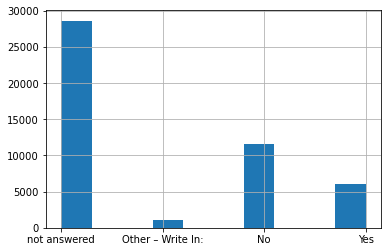

In [174]:
df[(np.nan, 'Do you consider yourself as a Data-Scientist?')].hist()

df_ds = df.loc[df[(np.nan, 'Do you consider yourself as a Data-Scientist?')] != 'Other – Write In:']
number_total = df_ds.shape[0]
number_no = (df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]=='Yes').sum()
number_yes = (df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]=='No').sum()
number_notans = (df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]=='not answered').sum()
print(f"I will study a popolution of {number_total} people:")
print(f"- {number_yes} people said: Yes ({round(100*number_yes/number_total,2)} %)")
print(f"- {number_no} people said: No ({round(100*number_no/number_total,2)} %)")
print(f"- {number_notans} people didn't answered ({round(100*number_notans/number_total,2)} %)")

possible_answer = list(set(df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]))

### 1.1 Data scientist & python
For people who consider themself as data scientist, python is the first programming language for more than the 90%; but also for other people that's high (those are python survey data!)

In [187]:
ds_stat_mainlang = pd.DataFrame()
for ans in possible_answer:
    ind = df_ds[(np.nan, 'Do you consider yourself as a Data-Scientist?')]==ans
    tmp_count = df_ds.loc[ind, (np.nan, 'Is Python the main language you use for your current projects?')].value_counts()
    tmp_count.name = ans
    ds_stat_mainlang = ds_stat_mainlang.append(pd.DataFrame(tmp_count.transpose()).transpose())
ds_stat_mainlang.index.name = (np.nan, 'Do you consider yourself as a Data-Scientist?')
ds_stat_mainlang.columns.name = (np.nan, 'Is Python the main language you use for your current projects?')
ds_stat_mainlang

"(nan, Is Python the main language you use for your current projects?)",not answered,Yes,"No, I use Python as a secondary language","No, I don’t use Python for my current projects"
"(nan, Do you consider yourself as a Data-Scientist?)",,,,
not answered,12073.0,12015,2667,1837.0
No,NaN,9492,2030,NaN
Yes,NaN,5545,558,NaN


In [188]:
ds_stat_mainlang = ds_stat_mainlang.drop(columns=['not answered'])
ds_stat_mainlang.apply(lambda x: np.round(100 * x / ds_stat_mainlang.sum(axis=1),2)) 

"(nan, Is Python the main language you use for your current projects?)",Yes,"No, I use Python as a secondary language","No, I don’t use Python for my current projects"
"(nan, Do you consider yourself as a Data-Scientist?)",,,
not answered,72.73,16.15,11.12
No,82.38,17.62,NaN
Yes,90.86,9.14,NaN


### 1.2 Data scientist & programming languages

In [181]:
ds_stat_lang = df_ds.groupby((np.nan, 'Do you consider yourself as a Data-Scientist?')).sum()['What other language(s) do you use?']
ds_stat_lang.columns.name = 'What other language(s) do you use?'
ds_stat_lang

What other language(s) do you use?,Bash / Shell,C/C++,C#,Clojure,CoffeeScript,Go,Groovy,HTML/CSS,Java,JavaScript,...,Perl,PHP,R,Ruby,Rust,Scala,SQL,Swift,TypeScript,Visual Basic
"(nan, Do you consider yourself as a Data-Scientist?)",,,,,,,,,,,,,,,,,,,,,
No,5455.0,3789.0,1439.0,116.0,78.0,1344.0,257.0,5063.0,2656.0,5834.0,...,350.0,1303.0,608.0,456.0,727.0,354.0,4779.0,255.0,1267.0,413.0
Yes,2408.0,2038.0,679.0,63.0,51.0,425.0,98.0,2237.0,1455.0,2378.0,...,179.0,653.0,1276.0,209.0,240.0,320.0,2708.0,165.0,368.0,330.0
not answered,4585.0,4065.0,1734.0,158.0,163.0,1315.0,302.0,5451.0,3167.0,6097.0,...,349.0,1794.0,337.0,573.0,620.0,262.0,4126.0,396.0,1168.0,640.0


The programmin language that data scientist know better than other coder are: ['C/C++' 'Perl' 'R' 'Scala' 'SQL' 'Visual Basic']


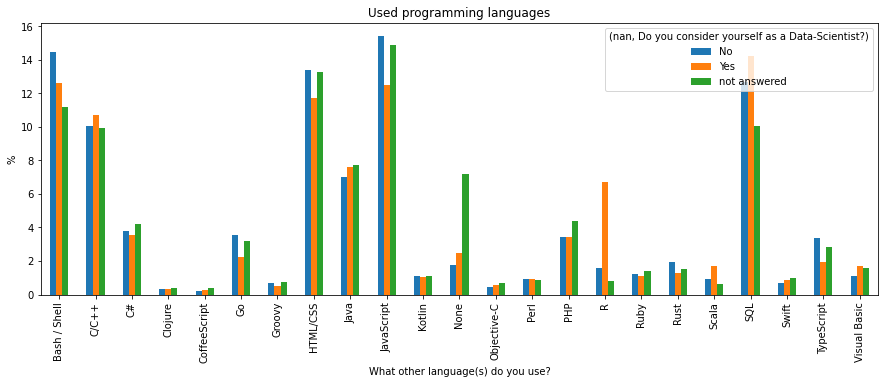

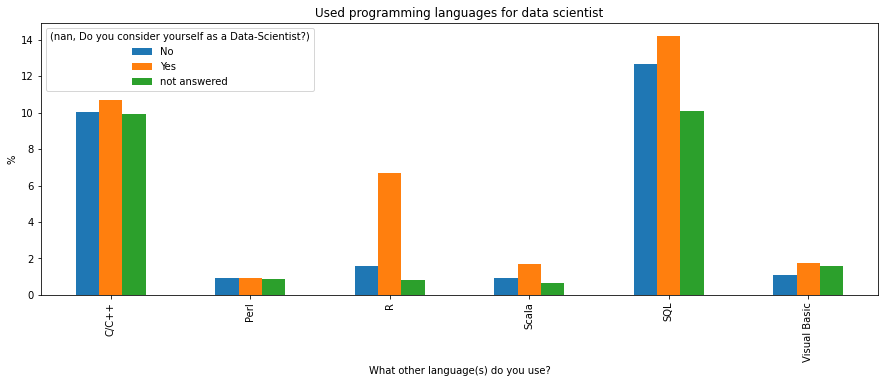

In [225]:
ds_stat_lang_perc = ds_stat_lang.apply(lambda x: np.round(100 * x / ds_stat_lang.sum(axis=1),2) )
ax = ds_stat_lang_perc.transpose().plot.bar(figsize=(15,5), title='Used programming languages')
ax.set_ylabel("%")

# best
best = (ds_stat_lang_perc == ds_stat_lang_perc.max()).loc['Yes']
ax = ds_stat_lang_perc[best[best].index.values].transpose().plot.bar(figsize=(15,5), title='Used programming languages for data scientist')
ax.set_ylabel("%")

best = (ds_stat_lang_perc == ds_stat_lang_perc.max()).loc['Yes']
print(f"The programmin language that data scientist know better than other coder are: {best[best].index.values}")

### 1.3 Data scientist & age

In [267]:
ds_stat_age = df_ds.groupby([(np.nan, 'How long have you been programming in Python?'), (np.nan, 'Do you consider yourself as a Data-Scientist?')]).count()[(np.nan,'response_id')].unstack()
ds_stat_age = ds_stat_age.loc[['Less than 1 year', '1–2 years','3–5 years','6–10 years','11+ years']]
ds_stat_age

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, How long have you been programming in Python?)",,,
Less than 1 year,1681,927,3625
1–2 years,2518,1505,2699
3–5 years,3592,2202,2899
6–10 years,2306,995,1607
11+ years,1425,474,1047


In [273]:
ds_stat_age2 = df_ds.groupby([(np.nan, 'How many years of professional coding experience do you have?'), (np.nan, 'Do you consider yourself as a Data-Scientist?')]).count()[(np.nan,'response_id')].unstack()
ds_stat_age2 = ds_stat_age2.loc[['Less than 1 year', '1–2 years','3–5 years','6–10 years','11+ years']]
ds_stat_age2

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, How many years of professional coding experience do you have?)",,,
Less than 1 year,2776,1431,4329
1–2 years,2170,1549,2179
3–5 years,2369,1514,2120
6–10 years,1801,782,1405
11+ years,2406,827,1784


In [269]:
ds_stat_age_perc = np.round(100 * ds_stat_age / ds_stat_age.sum(),2)
ds_stat_age_perc

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, How long have you been programming in Python?)",,,
Less than 1 year,14.59,15.19,30.52
1–2 years,21.85,24.66,22.72
3–5 years,31.18,36.08,24.41
6–10 years,20.01,16.30,13.53
11+ years,12.37,7.77,8.82


In [274]:
ds_stat_age_perc2 = np.round(100 * ds_stat_age2 / ds_stat_age2.sum(),2)
ds_stat_age_perc2

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, How many years of professional coding experience do you have?)",,,
Less than 1 year,24.09,23.45,36.63
1–2 years,18.83,25.38,18.44
3–5 years,20.56,24.81,17.94
6–10 years,15.63,12.81,11.89
11+ years,20.88,13.55,15.10


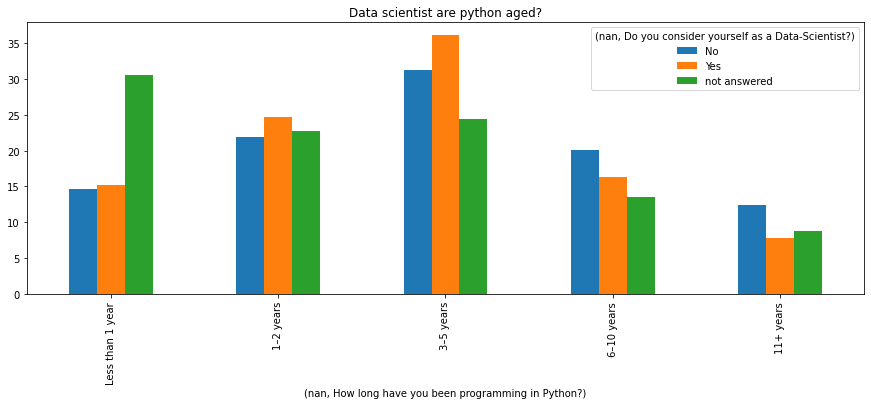

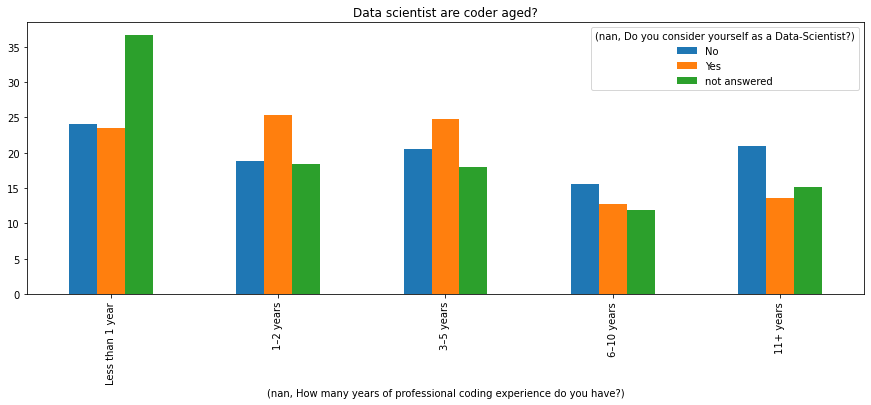

In [276]:
ds_stat_age_perc.plot.bar(figsize=(15,5), title='Data scientist are python aged?')
ds_stat_age_perc2.plot.bar(figsize=(15,5), title='Data scientist are coder aged?')

**Data scientist are coder with a lot of experience?**
It seems not! You can be a data scientist also with some years pf experience, bot in python or other programming languages

### 1.4 Data scientist & branch
For which purpose is python used the most by data scientist?

In [286]:
ds_stat_purpose = df_ds.groupby([(np.nan, 'What do you use Python for the most?'), 
              (np.nan, 'Do you consider yourself as a Data-Scientist?')]).count()[(np.nan,'response_id')].unstack()
ds_stat_purpose_perc = np.round(100 * ds_stat_purpose / ds_stat_purpose.sum(),2)
ds_stat_purpose_perc

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, What do you use Python for the most?)",,,
Computer graphics,0.93,0.84,1.51
Data analysis,17.57,35.67,NaN
Desktop development,3.95,1.88,6.53
DevOps / System administration / Writing automation scripts,11.28,3.58,14.07
Educational purposes,6.61,4.84,6.74
Embedded development,1.35,0.72,2.05
Game development,0.68,0.65,2.05
Machine learning,9.19,32.08,0.01
Mobile development,0.34,0.46,1.11


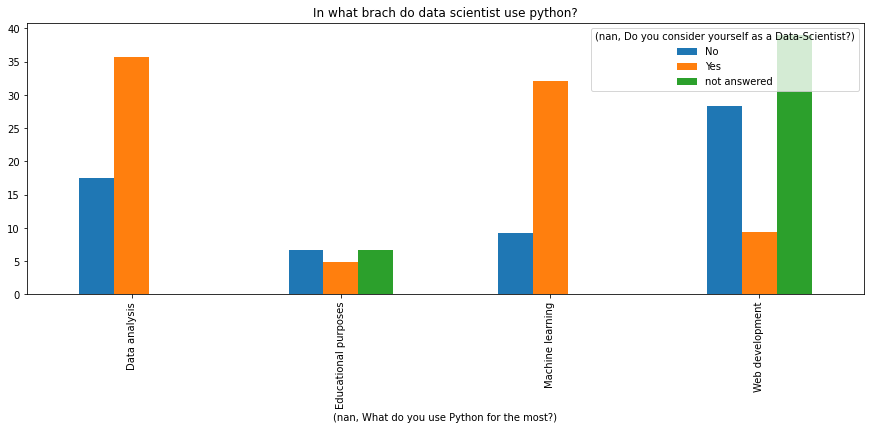

In [293]:
ds_stat_purpose_perc.loc[ds_stat_purpose_perc['Yes']>4].plot.bar(figsize=(15,5), title='In what brach do data scientist use python?')

### 1.5 Data Scientist & IDE

In [288]:
ds_stat_ide = df_ds.groupby([(np.nan, 'What is the main editor you use for your current Python development?'), 
              (np.nan, 'Do you consider yourself as a Data-Scientist?')]).count()[(np.nan,'response_id')].unstack()
ds_stat_ide_perc = np.round(100 * ds_stat_ide / ds_stat_ide.sum(),2)
ds_stat_ide_perc

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, What is the main editor you use for your current Python development?)",,,
Aptana,0.09,0.22,0.26
Atom,3.29,3.11,3.46
Eclipse + Pydev,1.18,0.79,1.45
Emacs,3.70,2.69,3.03
Gedit,0.34,0.22,0.38
IDLE,1.60,2.24,2.38
IntelliJ IDEA,1.99,1.44,2.29
Jupyter Notebook,3.04,13.47,0.70
JupyterLab,0.95,4.09,0.11


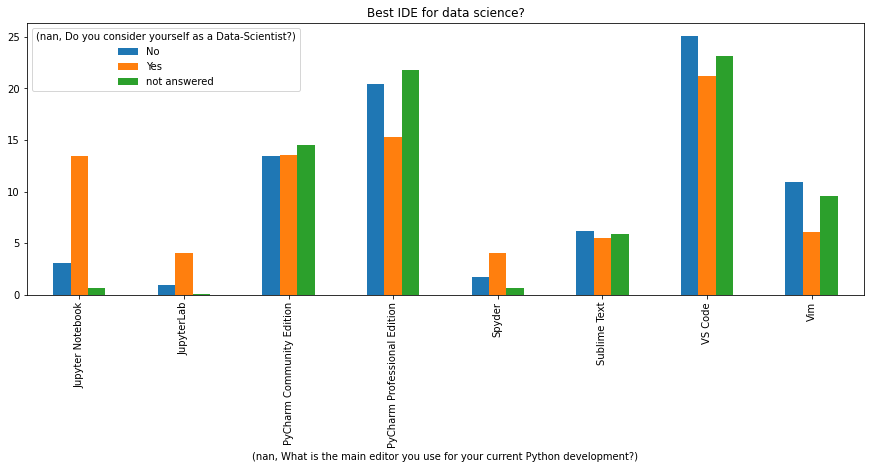

In [291]:
ds_stat_ide_perc.loc[ds_stat_ide_perc['Yes']>4].plot.bar(figsize=(15,5), title='Best IDE for data science?')

In [296]:
ds_stat_country = df_ds.groupby([(np.nan, 'What country do you live in?'), 
              (np.nan, 'Do you consider yourself as a Data-Scientist?')]).count()[(np.nan,'response_id')].unstack()
ds_stat_country_perc = np.round(100 * ds_stat_country / ds_stat_country.sum(),2)
ds_stat_country_perc

"(nan, Do you consider yourself as a Data-Scientist?)",No,Yes,not answered
"(nan, What country do you live in?)",,,
Afghanistan,0.02,0.02,0.16
Albania,0.13,0.09,0.23
Algeria,0.13,0.17,0.34
Argentina,0.74,0.37,0.91
Armenia,0.15,0.11,0.23
...,...,...,...
United States,23.52,18.84,16.54
Uruguay,0.08,0.15,0.10
Venezuela,0.10,0.11,0.18


In [300]:
ds_stat_country.loc['Italy']

(nan, Do you consider yourself as a Data-Scientist?)
No              161
Yes              80
not answered    149
Name: Italy, dtype: int64